In [828]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [829]:
# Data Cleaning/Processing Operation 1: Extract the features that we want
salary = pd.read_csv("survey_results_public.csv")
salary = salary[["Employment","RemoteWork" ,"EdLevel", "YearsCodePro", "DevType", "OrgSize", "Country","LanguageHaveWorkedWith", "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith","ConvertedCompYearly"]]
print(len(salary))
print(salary.dtypes)

73268
Employment                 object
RemoteWork                 object
EdLevel                    object
YearsCodePro               object
DevType                    object
OrgSize                    object
Country                    object
LanguageHaveWorkedWith     object
DatabaseHaveWorkedWith     object
PlatformHaveWorkedWith     object
ConvertedCompYearly       float64
dtype: object


In [830]:
# Data Cleaning/Processing Operation 2: Drop missing values
# Drop all rows with "NA"
salary = salary[pd.notna(salary["Employment"])]
salary = salary[pd.notna(salary["RemoteWork"])]
salary = salary[pd.notna(salary["EdLevel"])]
salary = salary[pd.notna(salary["YearsCodePro"])]
salary = salary[pd.notna(salary["DevType"])]
salary = salary[pd.notna(salary["OrgSize"])]
salary = salary[pd.notna(salary["Country"])]
salary = salary[pd.notna(salary["LanguageHaveWorkedWith"])]
salary = salary[pd.notna(salary["DatabaseHaveWorkedWith"])]
salary = salary[pd.notna(salary["PlatformHaveWorkedWith"])]
salary = salary[pd.notna(salary["ConvertedCompYearly"])]
print(len(salary))

26687


In [831]:
# Data Cleaning/Processing Operation 3: Focus on data we’re interested in
# Step 1: focus on data with full-time employment
salary = salary[salary["Employment"] == "Employed, full-time"]
print(len(salary))

21754


In [832]:
# Data Cleaning/Processing Operation 3: Focus on data we’re interested in
# Step 2: focus on data in USA
salary = salary[salary["Country"] == "United States of America"]
print(len(salary))

5633


In [833]:
# Data Cleaning/Processing Operation 3: Focus on data we’re interested in
# Step 3: focus on data for developers
salary = salary[salary["DevType"].str.contains("Developer, full-stack") | salary["DevType"].str.contains("Developer, front-end") | salary["DevType"].str.contains("Developer, back-end")]
print(len(salary))
salary.describe()

4626


,ConvertedCompYearly
count,4.626000e+03
mean,3.916226e+05
std,1.240966e+06
min,4.900000e+01
25%,1.100000e+05
50%,1.500000e+05
75%,2.000000e+05
max,2.250000e+07


In [834]:
# Data Cleaning/Processing Operation 4: Drop invalid values
salary = salary[salary["ConvertedCompYearly"] > 50000]
print(len(salary))
salary.describe()

4557


,ConvertedCompYearly
count,4.557000e+03
mean,3.970594e+05
std,1.249534e+06
min,5.100000e+04
25%,1.100000e+05
50%,1.500000e+05
75%,2.000000e+05
max,2.250000e+07


In [835]:
print(salary.dtypes)

Employment                 object
RemoteWork                 object
EdLevel                    object
YearsCodePro               object
DevType                    object
OrgSize                    object
Country                    object
LanguageHaveWorkedWith     object
DatabaseHaveWorkedWith     object
PlatformHaveWorkedWith     object
ConvertedCompYearly       float64
dtype: object


In [836]:
# Data Cleaning/Processing Operation 5: Cleanup and formatting the number
# Make "YearsCodePro" contain only numeric values
salary = salary.replace("Less than 1 year",0)
salary = salary.replace("More than 50 years",50)
salary["YearsCodePro"] = salary["YearsCodePro"].apply(lambda x: int(x))
print(salary.dtypes)

Employment                 object
RemoteWork                 object
EdLevel                    object
YearsCodePro                int64
DevType                    object
OrgSize                    object
Country                    object
LanguageHaveWorkedWith     object
DatabaseHaveWorkedWith     object
PlatformHaveWorkedWith     object
ConvertedCompYearly       float64
dtype: object


In [837]:
# Data Cleaning/Processing Operation 6: Remove duplicate row 
salary = salary.drop_duplicates()
print(len(salary))

4557


In [838]:
salary["DevType"].value_counts()

Developer, full-stack                                                                                                                971
Developer, back-end                                                                                                                  551
Developer, full-stack;Developer, back-end                                                                                            189
Developer, front-end;Developer, full-stack;Developer, back-end                                                                       179
Developer, front-end                                                                                                                 119
                                                                                                                                    ... 
Engineer, data;Developer, back-end;Blockchain                                                                                          1
Engineer, data;Developer, full-stack;Deve

In [839]:
# Data Cleaning/Processing Operation 7: Use one hot encoding to process the data
# Use one hot encoding for frone-end, back-end and full-stack
salary["frontEnd"] = 0
salary["frontEnd"].mask((salary["DevType"].str.contains("Developer, full-stack")) | (salary["DevType"].str.contains("Developer, front-end")), 1, inplace=True)

salary["backEnd"] = 0
salary["backEnd"].mask((salary["DevType"].str.contains("Developer, full-stack")) | (salary["DevType"].str.contains("Developer, back-end")), 1, inplace=True)

salary["FrontEnd"] = 0
salary["FrontEnd"].mask((salary["frontEnd"] == 1) & (salary["backEnd"] == 0), 1, inplace=True)

salary["BackEnd"] = 0
salary["BackEnd"].mask((salary["frontEnd"] == 0) & (salary["backEnd"] == 1), 1, inplace=True)

salary["FullStack"] = 0
salary["FullStack"].mask((salary["frontEnd"] == 1) & (salary["backEnd"] == 1), 1, inplace=True)

salary.drop(columns=["DevType", "frontEnd", "backEnd"], inplace=True)

In [840]:
salary["LanguageHaveWorkedWith"].value_counts()

C#;HTML/CSS;JavaScript;SQL;TypeScript                            87
C#;HTML/CSS;JavaScript;SQL                                       64
C#;HTML/CSS;JavaScript;PowerShell;SQL;TypeScript                 56
HTML/CSS;JavaScript;TypeScript                                   40
HTML/CSS;JavaScript;PHP;SQL                                      33
                                                                 ..
Bash/Shell;Elixir;Groovy;HTML/CSS;Java;JavaScript;LISP;Python     1
C#;HTML/CSS;JavaScript;PowerShell;Python;TypeScript               1
Clojure;Haskell;HTML/CSS;JavaScript;TypeScript                    1
C;C#;C++;JavaScript;PowerShell;Python;Rust;SQL                    1
Bash/Shell;Groovy;HTML/CSS;Java;Python;Scala                      1
Name: LanguageHaveWorkedWith, Length: 2711, dtype: int64

In [841]:
# Data Cleaning/Processing Operation 8: Processing text values into numerical values
# Step 1: split “LanguageHaveWorkedWith”, create columns to keep track of the number of front-end languages, back-end languages, and system programming languages each person knows
salary["Front-endLan"] = 0
salary["Back-endLan"] = 0
salary["SysProLan"] = 0
salary["LanguageHaveWorkedWith"] = salary["LanguageHaveWorkedWith"].apply(lambda x: x.split(";"))
Front_end =["JavaScript","HTML/CSS", "Swift","TypeScript","Kotlin","Objective-C","Dart"]
Back_end =["Ruby", "SQL", "Go", "Java", "Python", "Elixir", "Perl", "Groovy", "Scala", "Rust", "C#", "Erlang", "PHP", "Clojure"]
System =["Assembly","C++","C","Rust","Go"]

for num, people in salary.iterrows():
    languages = people["LanguageHaveWorkedWith"]
    for language in languages:
        if language in Front_end:
            salary.at[num,"Front-endLan"] = salary.at[num,"Front-endLan"] +1
        elif language in Back_end:
            salary.at[num,"Back-endLan"] = salary.at[num,"Back-endLan"]+1
        elif language in System:
            salary.at[num,"SysProLan"] = salary.at[num,"SysProLan"]+1
            
salary.drop(columns=["LanguageHaveWorkedWith"], inplace=True)  

In [842]:
salary["DatabaseHaveWorkedWith"].value_counts()

Microsoft SQL Server                                                                   360
PostgreSQL                                                                             358
MySQL                                                                                  165
PostgreSQL;Redis                                                                       140
MySQL;PostgreSQL                                                                        93
                                                                                      ... 
MariaDB;MongoDB;PostgreSQL;Redis                                                         1
Microsoft SQL Server;MySQL;Oracle;Redis;SQLite                                           1
DynamoDB;Elasticsearch;Microsoft SQL Server;Neo4j;Oracle;Redis                           1
Cassandra;DynamoDB;MariaDB;MySQL;Redis;SQLite                                            1
IBM DB2;Microsoft SQL Server;MongoDB;MySQL;Oracle;Firebase Realtime Database;SQLite      1

In [843]:
# Data Cleaning/Processing Operation 8: Processing text values into numerical values
# Step 2: counting databases have worked with 
salary["NumOfDatabasesHaveWorkedWith"] = salary["DatabaseHaveWorkedWith"].apply(lambda x: len(x.split(";")))

salary.drop(columns=["DatabaseHaveWorkedWith"], inplace=True)  

In [844]:
salary["PlatformHaveWorkedWith"].value_counts()

AWS                                                                            1288
Microsoft Azure                                                                 558
AWS;Microsoft Azure                                                             305
AWS;Google Cloud                                                                220
AWS;Heroku                                                                      153
                                                                               ... 
AWS;DigitalOcean;Managed Hosting;OpenStack;OVH;VMware                             1
Colocation;Google Cloud                                                           1
AWS;DigitalOcean;Google Cloud;Heroku;Oracle Cloud Infrastructure;VMware           1
AWS;DigitalOcean;Google Cloud;Linode;Microsoft Azure;VMware                       1
Colocation;DigitalOcean;Google Cloud;Managed Hosting;Microsoft Azure;VMware       1
Name: PlatformHaveWorkedWith, Length: 325, dtype: int64

In [845]:
# Data Cleaning/Processing Operation 8: Processing text values into numerical values
# Step 3: counting platforms have worked with 
salary["NumOfPlatformsHaveWorkedWith"] = salary["PlatformHaveWorkedWith"].apply(lambda x: len(x.split(";")))

salary.drop(columns=["PlatformHaveWorkedWith"], inplace=True) 

In [846]:
# Data Cleaning/Processing Operation 9: Rearrange the column
salary = salary[["Country", "EdLevel", "YearsCodePro", "Employment", "RemoteWork", "OrgSize", "FrontEnd", "BackEnd", "FullStack", "Front-endLan", "Back-endLan", "SysProLan", "NumOfDatabasesHaveWorkedWith", "NumOfPlatformsHaveWorkedWith", "ConvertedCompYearly"]]
salary.describe()

,YearsCodePro,FrontEnd,BackEnd,FullStack,Front-endLan,Back-endLan,SysProLan,NumOfDatabasesHaveWorkedWith,NumOfPlatformsHaveWorkedWith,ConvertedCompYearly
count,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4.557000e+03
mean,11.482993,0.042133,0.262014,0.695853,2.078780,2.584815,0.231073,2.719552,1.843318,3.970594e+05
std,8.941866,0.200915,0.439779,0.460096,1.169813,1.381433,0.594399,1.619649,1.092730,1.249534e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.100000e+04
25%,5.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.100000e+05
50%,9.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.500000e+05
75%,16.000000,0.000000,1.000000,1.000000,3.000000,3.000000,0.000000,4.000000,2.000000,2.000000e+05
max,50.000000,1.000000,1.000000,1.000000,6.000000,10.000000,3.000000,15.000000,11.000000,2.250000e+07


<AxesSubplot:xlabel='YearsCodePro', ylabel='ConvertedCompYearly'>

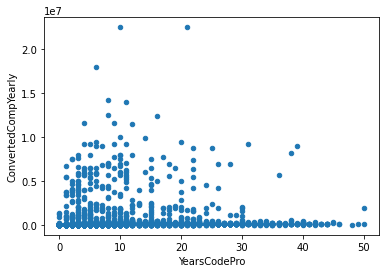

In [847]:
salary.plot.scatter(x="YearsCodePro", y="ConvertedCompYearly")

<AxesSubplot:xlabel='YearsCodePro', ylabel='ConvertedCompYearly'>

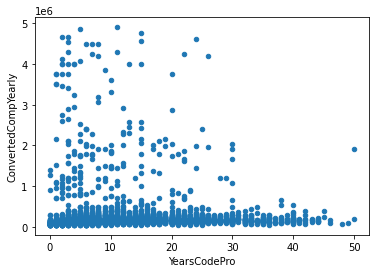

In [848]:
# Data Cleaning/Processing Operation 10: Check outlier
# Step 1: remove data with annual salary >= 5,000,000
salary = salary[salary["ConvertedCompYearly"] < 5000000]
salary.plot.scatter(x="YearsCodePro", y="ConvertedCompYearly")

<AxesSubplot:xlabel='YearsCodePro', ylabel='ConvertedCompYearly'>

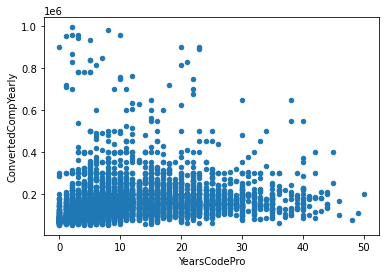

In [849]:
# Data Cleaning/Processing Operation 10: Check outlier
# Step 2: remove data with annual salary >= 1,000,000
salary = salary[salary["ConvertedCompYearly"] < 1000000]
salary.plot.scatter(x="YearsCodePro", y="ConvertedCompYearly")

,YearsCodePro,FrontEnd,BackEnd,FullStack,Front-endLan,Back-endLan,SysProLan,NumOfDatabasesHaveWorkedWith,NumOfPlatformsHaveWorkedWith,ConvertedCompYearly
count,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000
mean,11.006869,0.045388,0.253435,0.701178,2.105005,2.566241,0.217370,2.716634,1.848135,149451.294652
std,8.197528,0.208178,0.435031,0.457798,1.160184,1.374180,0.575024,1.624182,1.092865,55819.183175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,51000.000000
25%,5.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,108918.750000
50%,9.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,2.000000,2.000000,140000.000000
75%,16.000000,0.000000,1.000000,1.000000,3.000000,3.000000,0.000000,4.000000,2.000000,180000.000000
max,36.000000,1.000000,1.000000,1.000000,6.000000,10.000000,3.000000,15.000000,11.000000,345000.000000


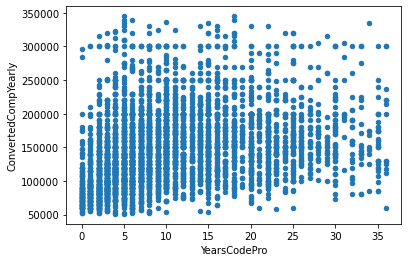

In [851]:
# Data Cleaning/Processing Operation 10: Check outlier
# Step 3: filter out data more than 3 std devs from mean
salary = salary[(np.abs(stats.zscore(salary[["YearsCodePro", "ConvertedCompYearly"]])) < 3).all(axis=1)]
salary.plot.scatter(x="YearsCodePro", y="ConvertedCompYearly")
salary.describe()